In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('data-2.csv.gz')
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")
print(f"Trials: {df.shape[0]}")

Dataset shape: (683, 11191)
Features: 11190
Trials: 683


In [ ]:
print(df.dtypes)

label              int64
unit_0000_bin_0    int64
unit_0001_bin_0    int64
unit_0002_bin_0    int64
unit_0003_bin_0    int64
                   ...  
unit_2233_bin_4    int64
unit_2234_bin_4    int64
unit_2235_bin_4    int64
unit_2236_bin_4    int64
unit_2237_bin_4    int64
Length: 11191, dtype: object


In [11]:
# Check missing values
print(f"Missing values: {df.isnull().sum().sum()}")


Missing values: 0


In [25]:
X = df.drop('label', axis=1)
y = df['label']
X_array = X.values

### Class Distribution

In [26]:
class_counts = y.value_counts().sort_index()
class_props = y.value_counts(normalize=True).sort_index()

print("Distribution:")
for label, count in class_counts.items():
    direction = "Left" if label == 0 else "Right"
    prop = class_props[label]
    print(f"  {direction} ({label}): {count} trials ({prop:.1%})")

imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nImbalance ratio: {imbalance_ratio:.2f}")

Distribution:
  Left (0): 208 trials (30.5%)
  Right (1): 475 trials (69.5%)

Imbalance ratio: 2.28


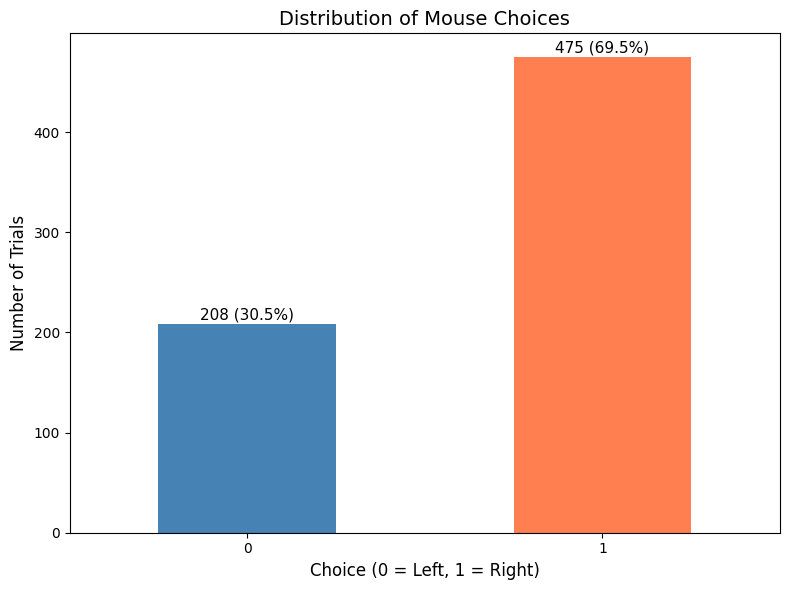

In [ ]:
plt.figure(figsize=(8, 6))
counts = df['label'].value_counts().sort_index()
bars = counts.plot(kind='bar', color=['steelblue', 'coral'])
for i, (count, prop) in enumerate(zip(class_counts.values, class_props.values)):
    label_text = f"{count} ({prop:.1%})"
    plt.text(i, count + 2, label_text, ha='center', va='bottom', fontsize=11)
plt.title('Distribution of Mouse Choices', fontsize=14)
plt.xlabel('Choice (0 = Left, 1 = Right)', fontsize=12)
plt.ylabel('Number of Trials', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Sparsity check


In [ ]:
total_zeros = (X_array == 0).sum()
zero_prop = total_zeros / X_array.size
feature_zeros = (X_array == 0).sum(axis=0) / X_array.shape[0]

print(f"Overall sparsity: {zero_prop:.1%} of all values are zero")
print(f"  Features with >50% zeros: {(feature_zeros > 0.5).sum()} ({(feature_zeros > 0.5).sum()/len(feature_zeros)*100:.1f}%)")
print(f"  Features with >90% zeros: {(feature_zeros > 0.9).sum()} ({(feature_zeros > 0.9).sum()/len(feature_zeros)*100:.1f}%)")
print(f"  Features with >99% zeros: {(feature_zeros > 0.99).sum()} ({(feature_zeros > 0.99).sum()/len(feature_zeros)*100:.1f}%)")

Overall sparsity: 74.0% of all values are zero
  Features with >50% zeros: 9436 (84.3%)
  Features with >90% zeros: 3898 (34.8%)
  Features with >99% zeros: 1832 (16.4%)


### Correlation Check

Correlation analysis (947 sampled features):
  Mean |r| = 0.043
  Max |r|  = 1.000
  Pairs with |r| > 0.7: 64
  Pairs with |r| > 0.9: 53


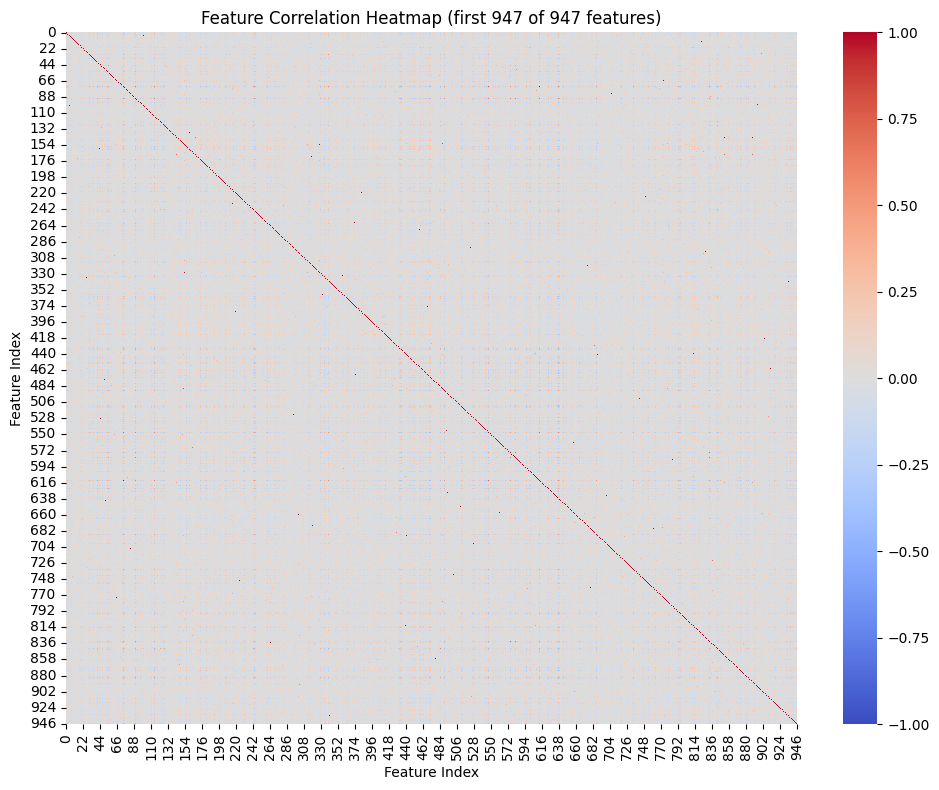

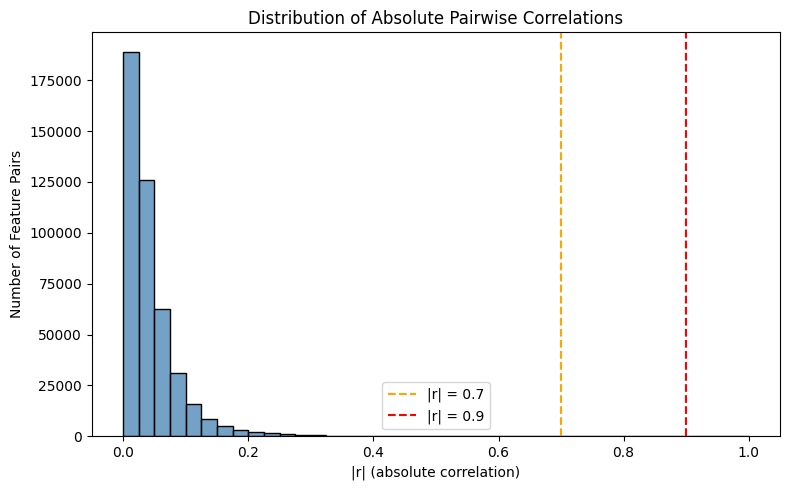

In [ ]:
n_sample_corr = min(100, X.shape[1])
sample_idx = np.random.choice(X.shape[1], n_sample_corr, replace=False)
X_sample = X_array[:, sample_idx]

std_mask = X_sample.std(axis=0) > 1e-6
X_sample = X_sample[:, std_mask]

corr_matrix = np.corrcoef(X_sample.T)

upper_corr = corr_matrix[np.triu_indices_from(corr_matrix, k=1)]
abs_corr = np.abs(upper_corr)

mean_corr = abs_corr.mean()
max_corr = abs_corr.max()
high_corr = np.sum(abs_corr > 0.7)
very_high_corr = np.sum(abs_corr > 0.9)

print(f"Correlation analysis ({X_sample.shape[1]} sampled features):")
print(f"  Mean |r| = {mean_corr:.3f}")
print(f"  Max |r|  = {max_corr:.3f}")
print(f"  Pairs with |r| > 0.7: {high_corr}")
print(f"  Pairs with |r| > 0.9: {very_high_corr}")

n_viz = min(100, X_sample.shape[1])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[:n_viz, :n_viz], cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title(f'Feature Correlation Heatmap (first {n_viz} of {X_sample.shape[1]} features)')
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(abs_corr, bins=40, color='steelblue', edgecolor='black')
plt.axvline(0.7, color='orange', linestyle='--', label='|r| = 0.7')
plt.axvline(0.9, color='red', linestyle='--', label='|r| = 0.9')
plt.title('Distribution of Absolute Pairwise Correlations')
plt.xlabel('|r| (absolute correlation)')
plt.ylabel('Number of Feature Pairs')
plt.legend()
plt.tight_layout()
plt.show()
